In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [446]:
df = pd.read_excel('employee_attrition.xlsx')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [448]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [449]:
df.duplicated().sum()

0

In [450]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [451]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [452]:
# Getting rid of unnecessary columns: EmployeeCount, EmployeeNumber, Over18, StandardHours
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [453]:
arr = df.columns
len(arr)

31

In [454]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

**From the initial analysis it is clear that there were 35 columns out of which 9 are categorical and rest numerical. There are a total of 1470 records and no nulls. We saw in some of the features all the values are same or the values are not making any sense to determine the target variable, Attrition, so dropped those features. Now the total feature count is 31.**

In [455]:
# seggregate categorical and numerical features
categorical_features = [i for i in df.columns if df[i].dtypes == 'object']
numerical_features = [i for i in df.columns if i not in categorical_features]

categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [456]:
for i in categorical_features:
    print(df[i].value_counts())
    print()

No     1233
Yes     237
Name: Attrition, dtype: int64

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64



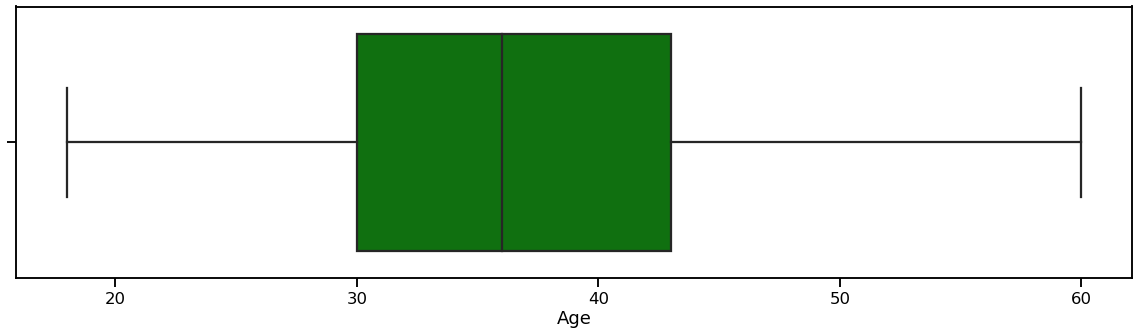

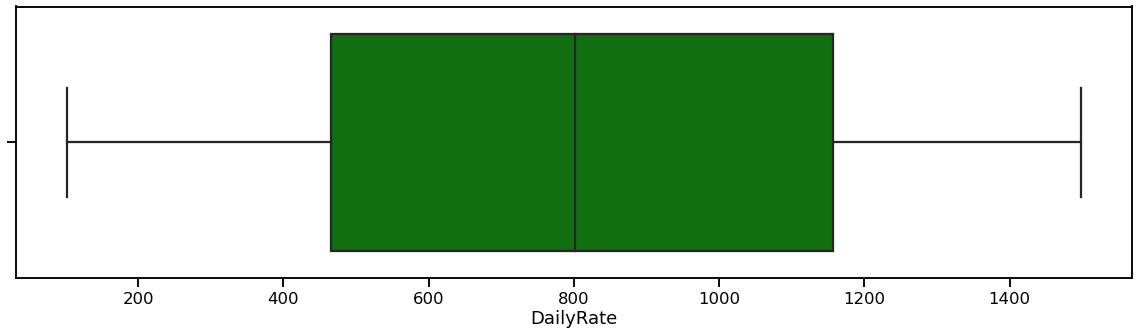

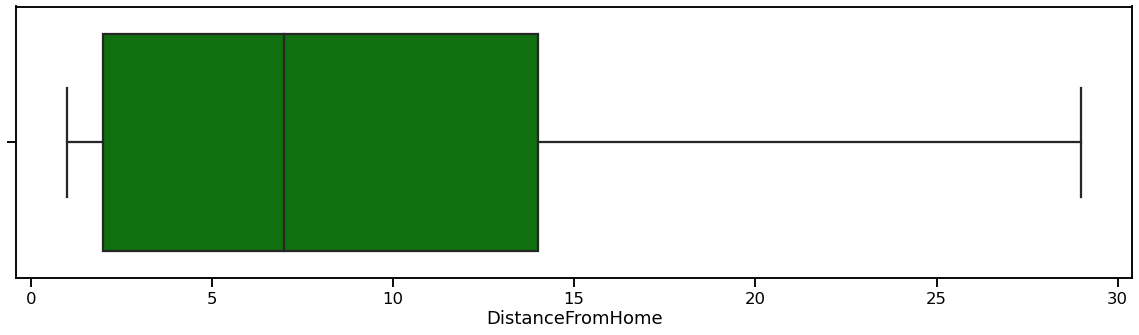

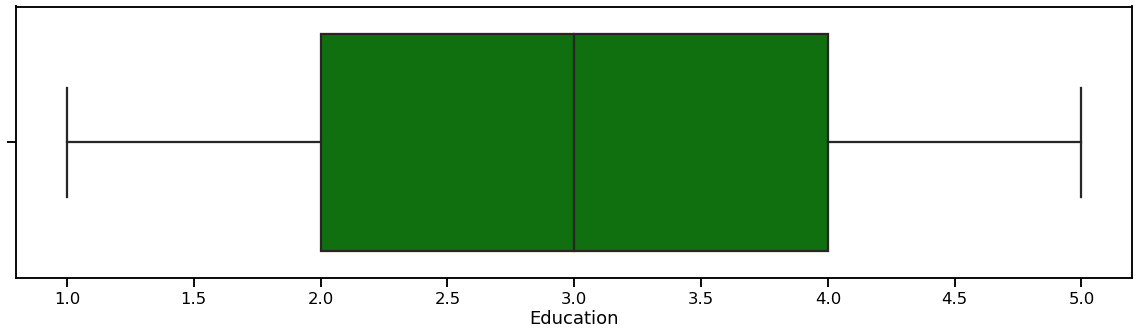

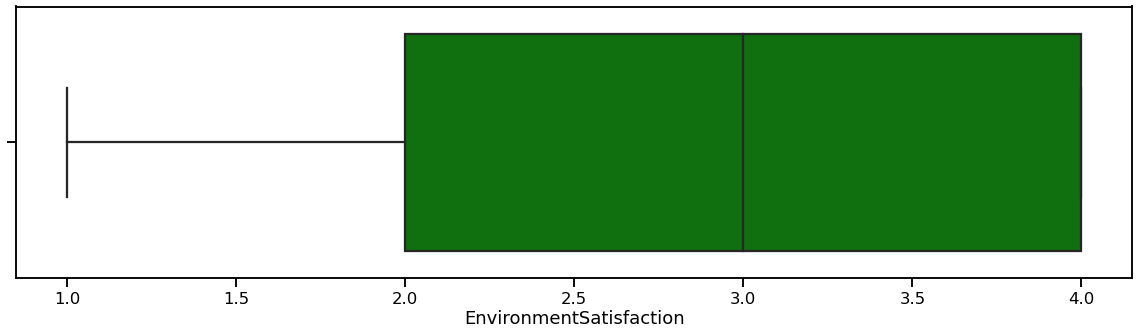

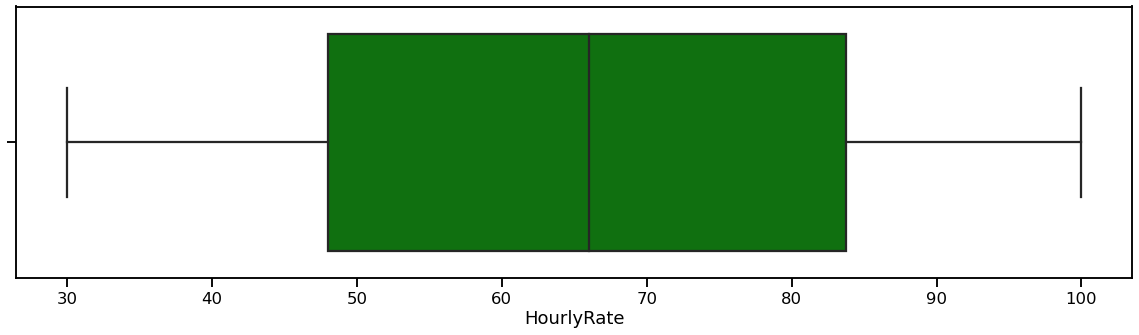

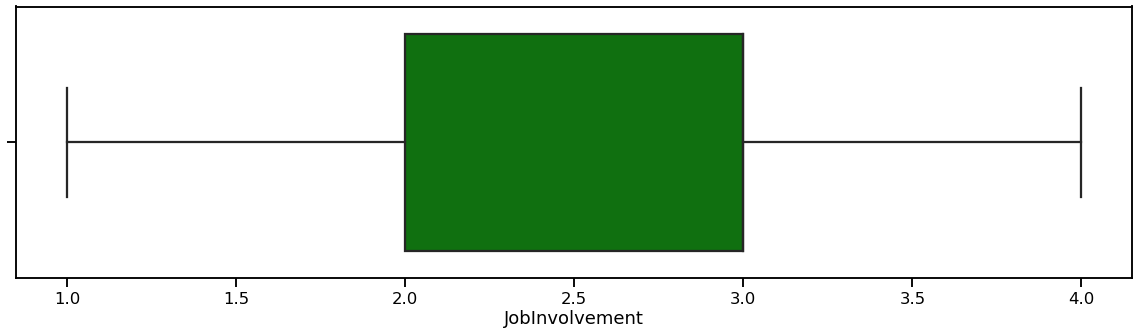

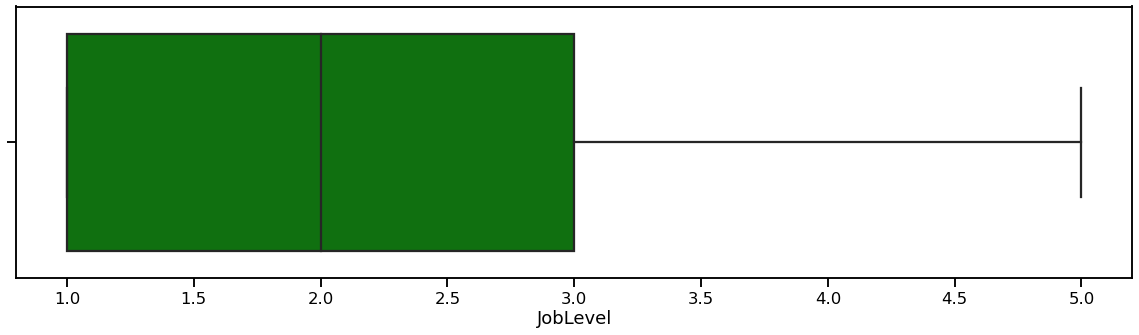

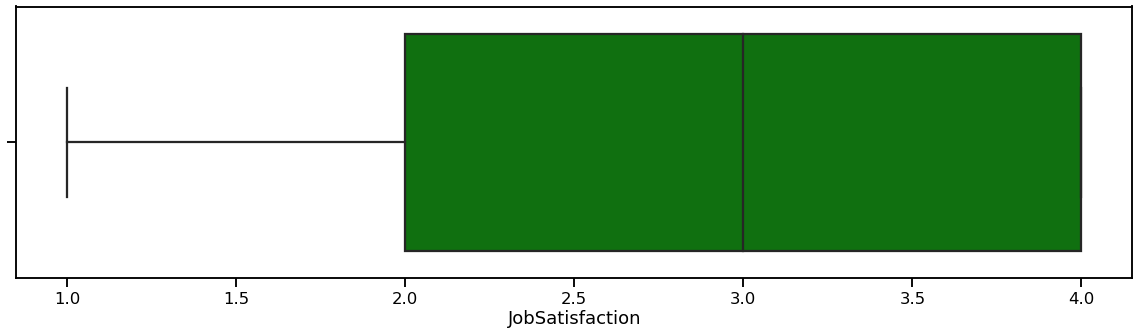

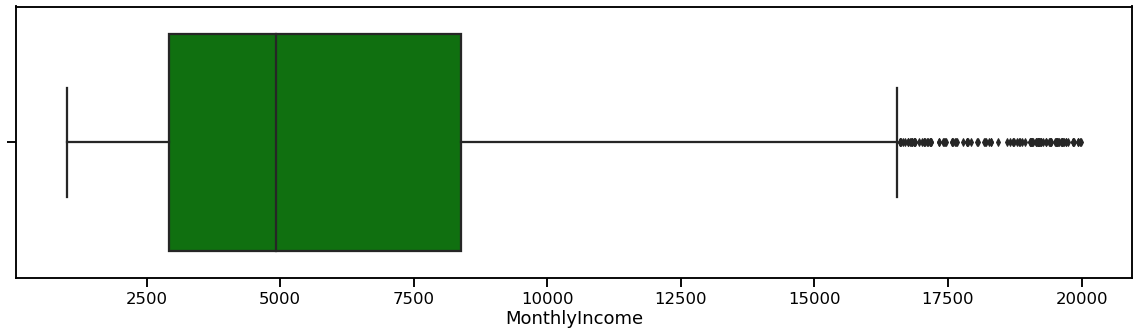

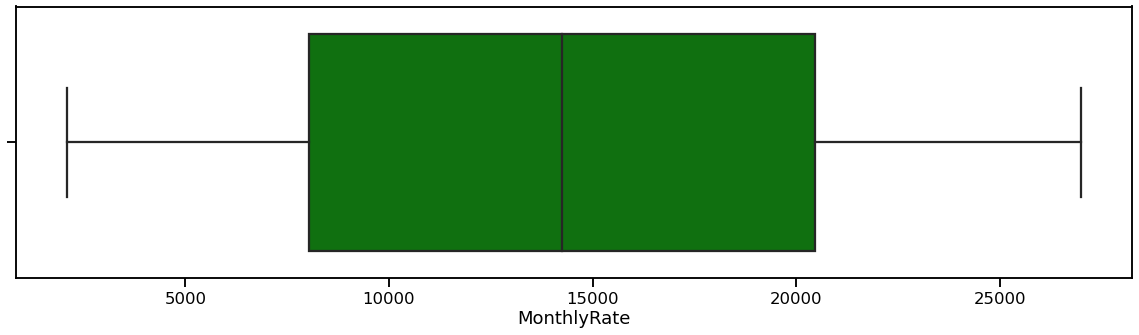

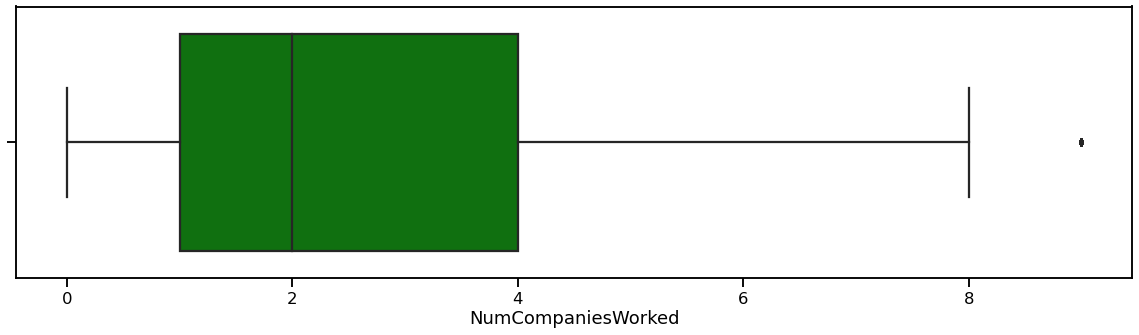

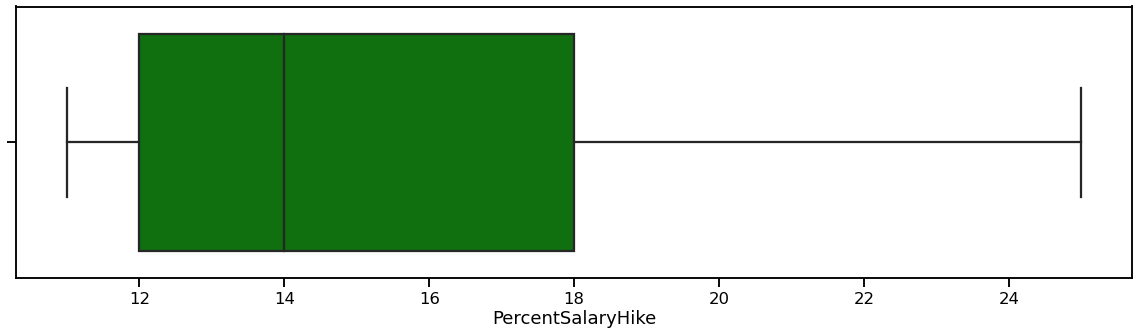

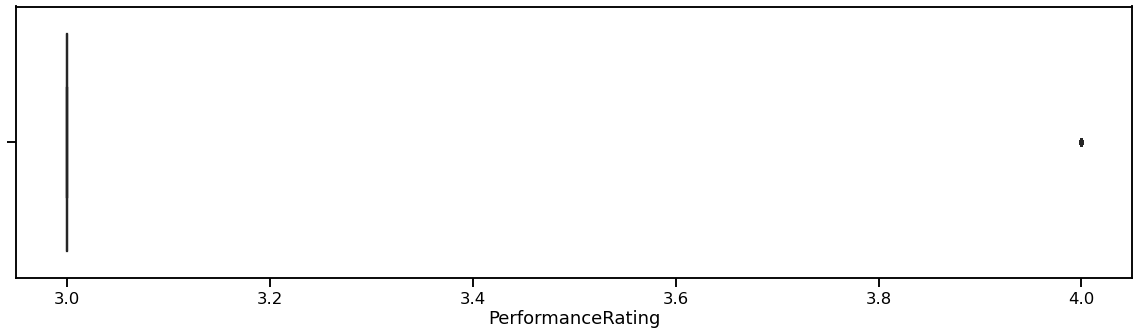

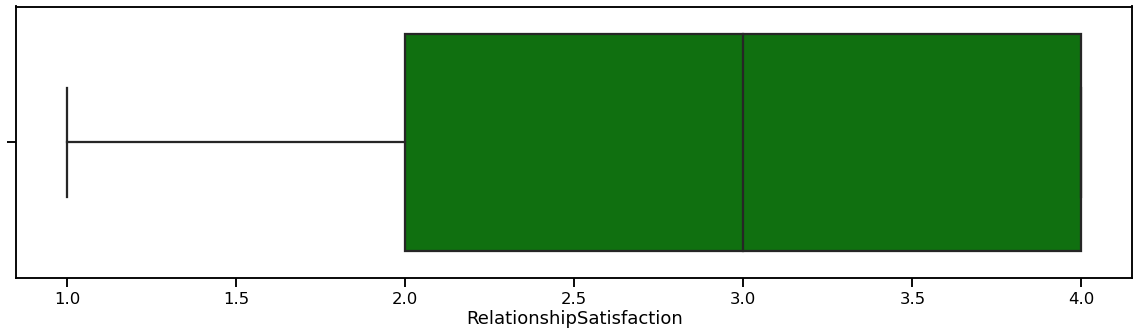

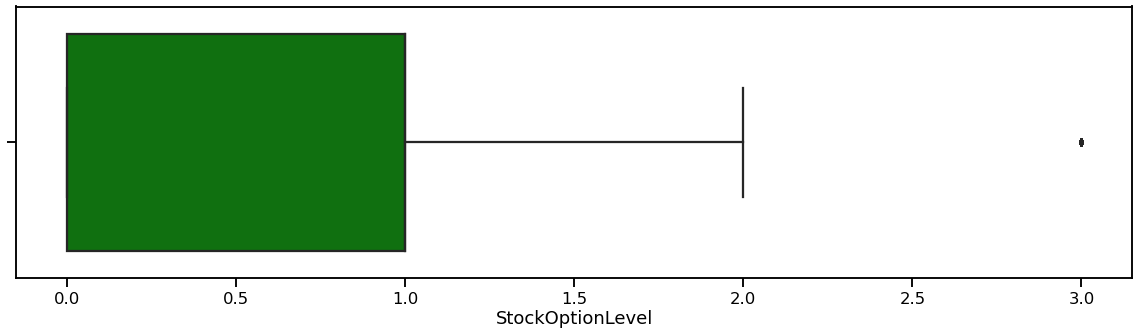

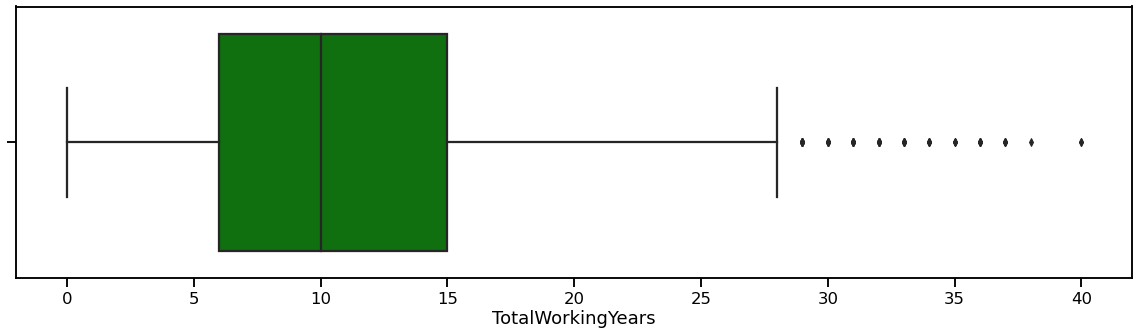

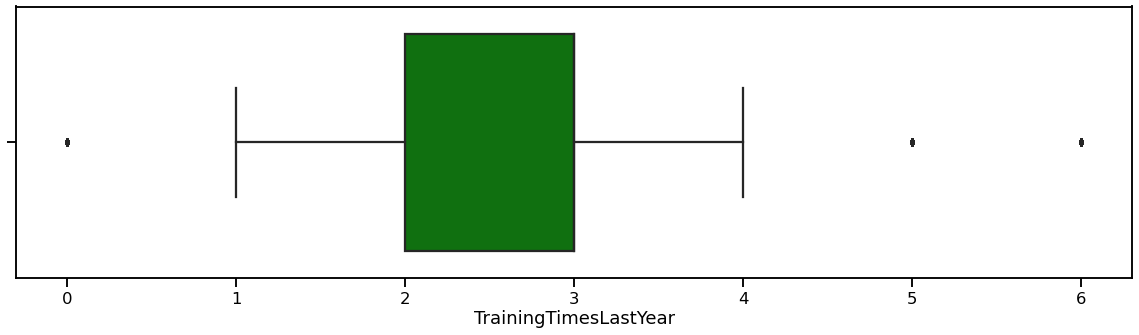

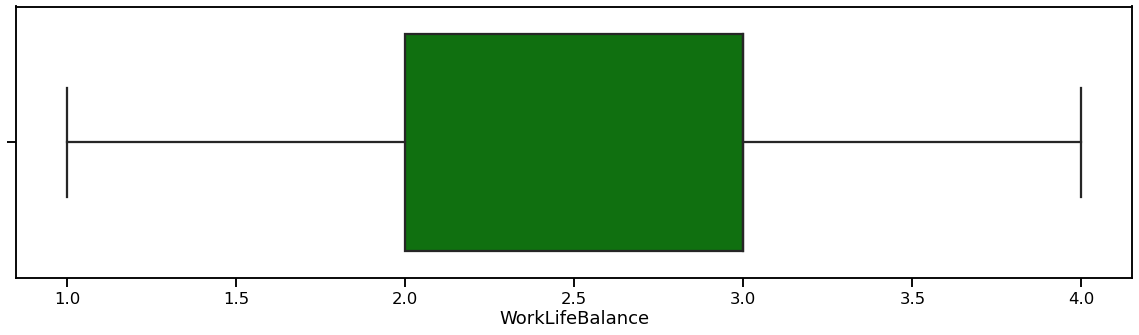

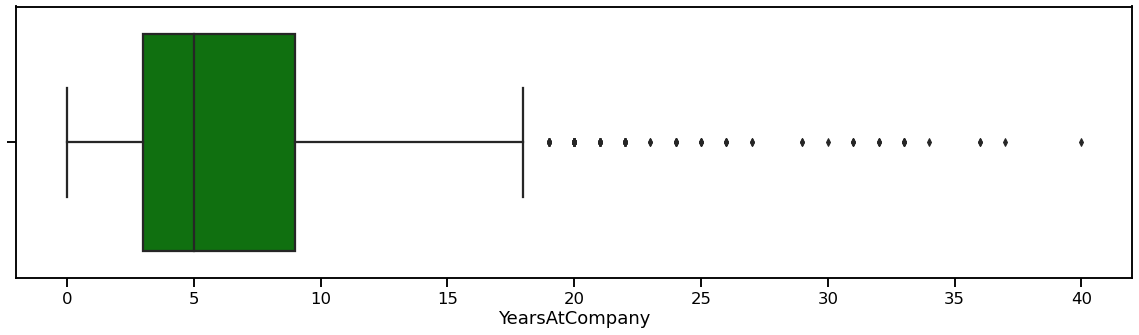

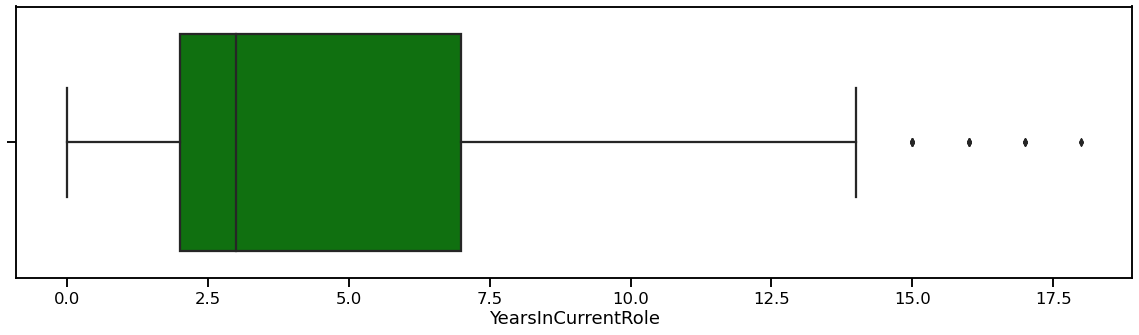

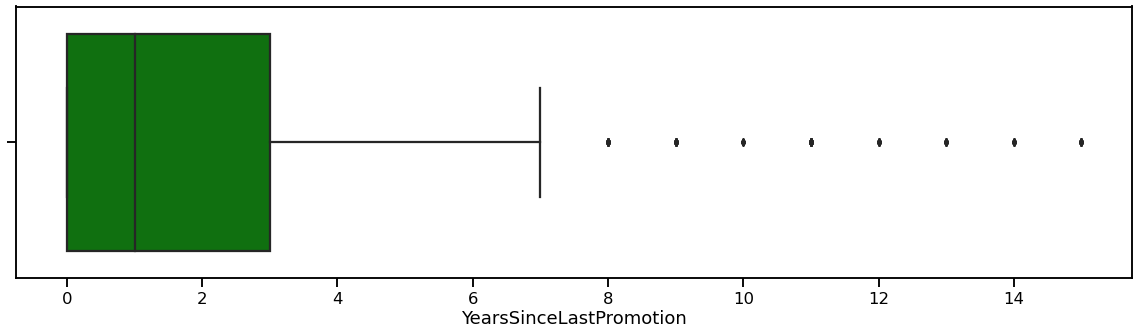

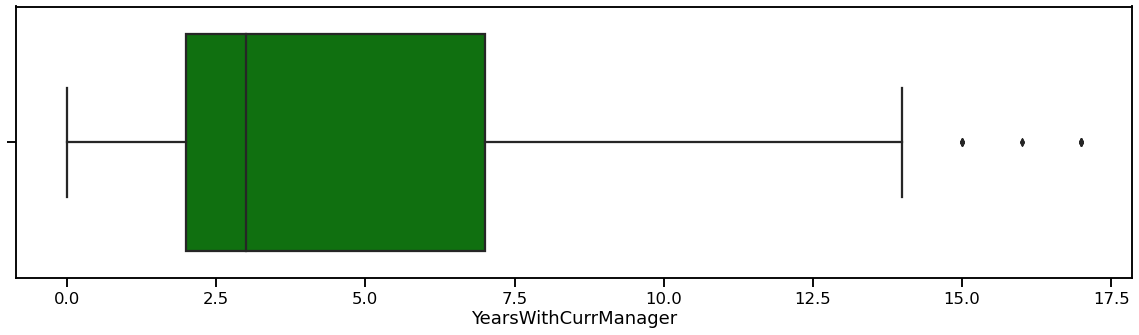

In [457]:
# Check outliers and data distribution of the numerical columns
for i in numerical_features:
    plt.figure(figsize=(20,5))
    sns.boxplot(df[i], color='green')
    plt.show()

In [458]:
def bound(df, feat):
    ''' Calculate IQR and the respective upper and lower bounds '''
    upper = lower = per25 = per75 = iqr = 0
    per25 = np.percentile(df[feat], 25)
    per75 = np.percentile(df[feat], 75)
    iqr = per75 - per25
    lower = per25 - (1.5*iqr)
    upper = per75 + (1.5*iqr)
    return lower, upper

In [460]:
# Count of outliers for each feature in train as well as test set
print('Number of outliers in each of the numerical features : ')
print()
to_replace = []
for i in numerical_features:
    print(f"In {i} lesser than lower bound: ", df[df[f'{i}']<bound(df, f'{i}')[0]].shape[0])
    print(f"In {i} greater than upper bound: ", df[df[f'{i}']>bound(df, f'{i}')[1]].shape[0])
    if df[df[f'{i}']<bound(df, f'{i}')[0]].shape[0] != 0 or df[df[f'{i}']>bound(df, f'{i}')[1]].shape[0] != 0:
        to_replace.append(i)
    print()
to_replace

Number of outliers in each of the numerical features : 

In Age lesser than lower bound:  0
In Age greater than upper bound:  0

In DailyRate lesser than lower bound:  0
In DailyRate greater than upper bound:  0

In DistanceFromHome lesser than lower bound:  0
In DistanceFromHome greater than upper bound:  0

In Education lesser than lower bound:  0
In Education greater than upper bound:  0

In EnvironmentSatisfaction lesser than lower bound:  0
In EnvironmentSatisfaction greater than upper bound:  0

In HourlyRate lesser than lower bound:  0
In HourlyRate greater than upper bound:  0

In JobInvolvement lesser than lower bound:  0
In JobInvolvement greater than upper bound:  0

In JobLevel lesser than lower bound:  0
In JobLevel greater than upper bound:  0

In JobSatisfaction lesser than lower bound:  0
In JobSatisfaction greater than upper bound:  0

In MonthlyIncome lesser than lower bound:  0
In MonthlyIncome greater than upper bound:  114

In MonthlyRate lesser than lower bound:  

['MonthlyIncome',
 'NumCompaniesWorked',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [461]:
# cap the outliers with upper or lower bound values
for i in to_replace:
    if i =='PerformanceRating':
        continue
    df[i] = df[i].apply(lambda x: round(bound(df, i)[1]) if (x > bound(df, i)[1]) else x)
    df[i] = df[i].apply(lambda x: round(bound(df, i)[0]) if (x < bound(df, i)[0]) else x)

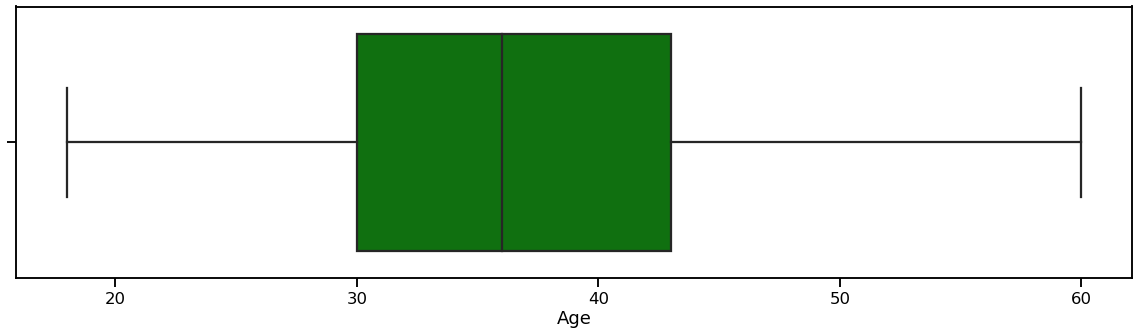

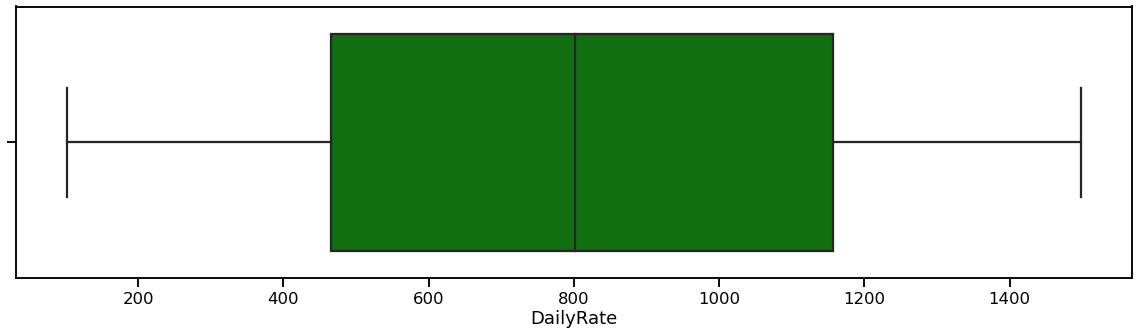

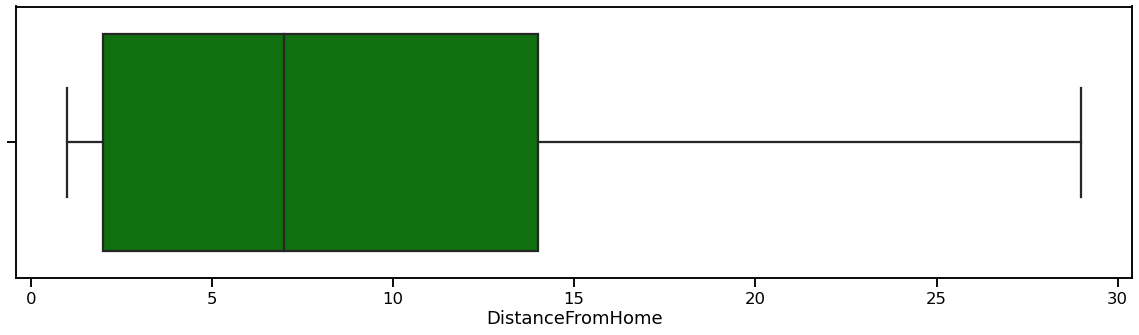

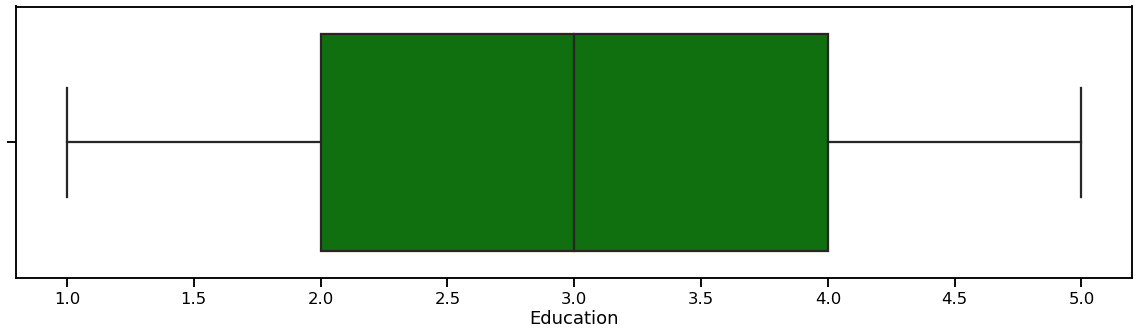

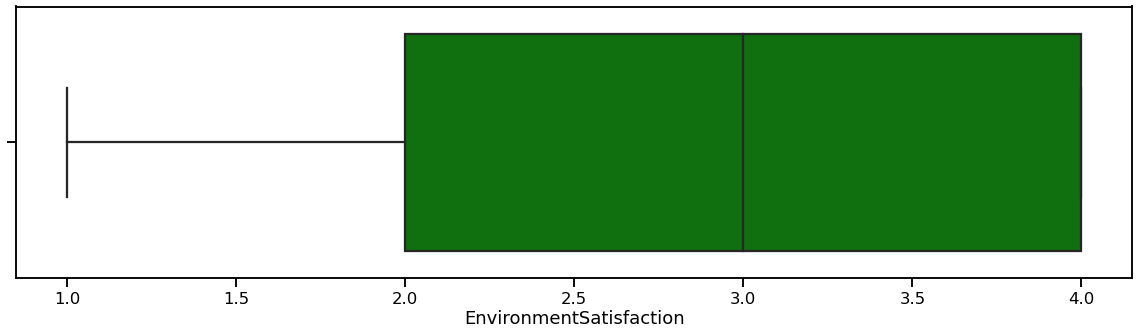

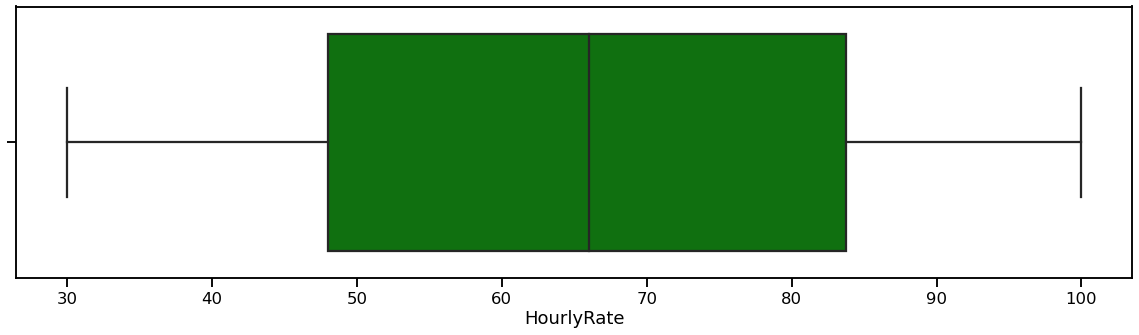

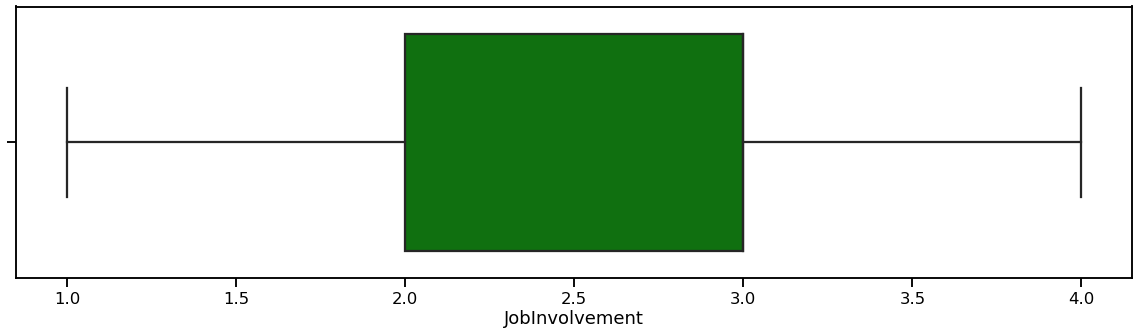

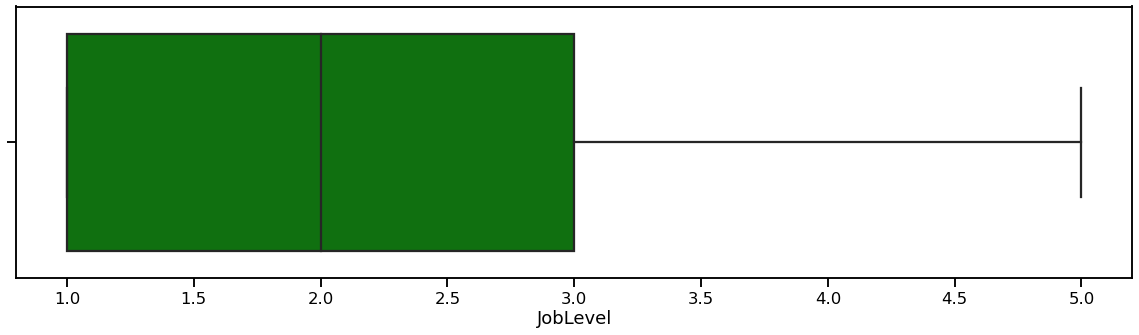

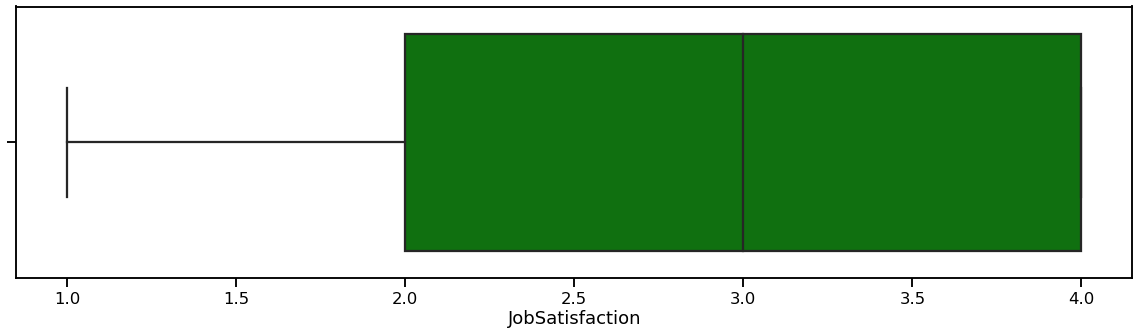

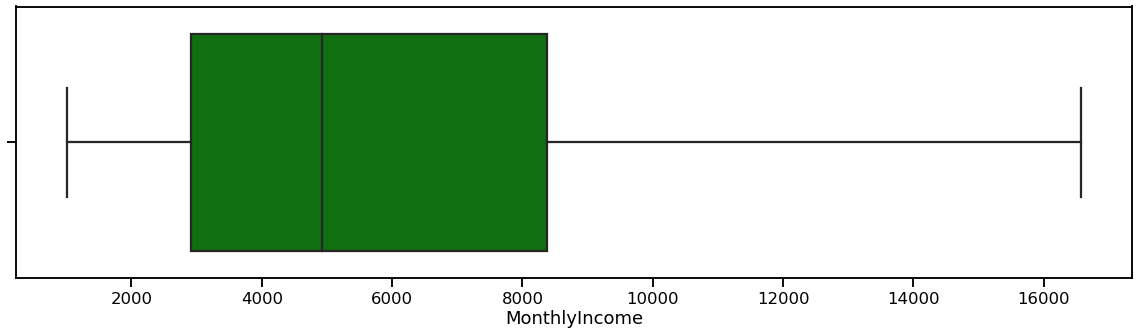

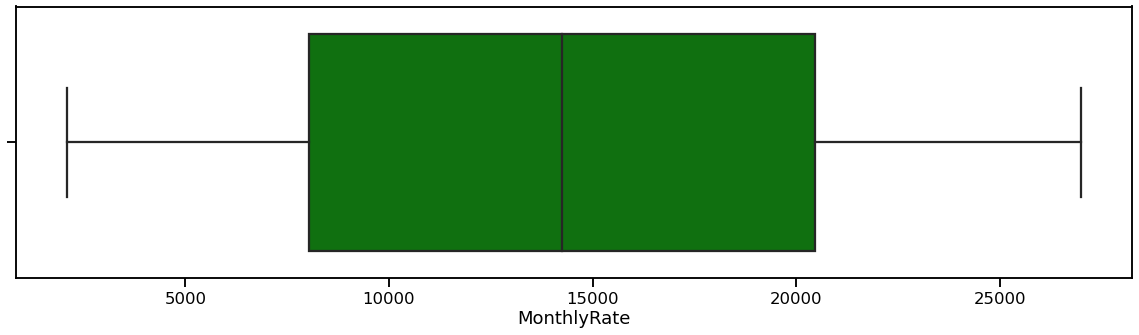

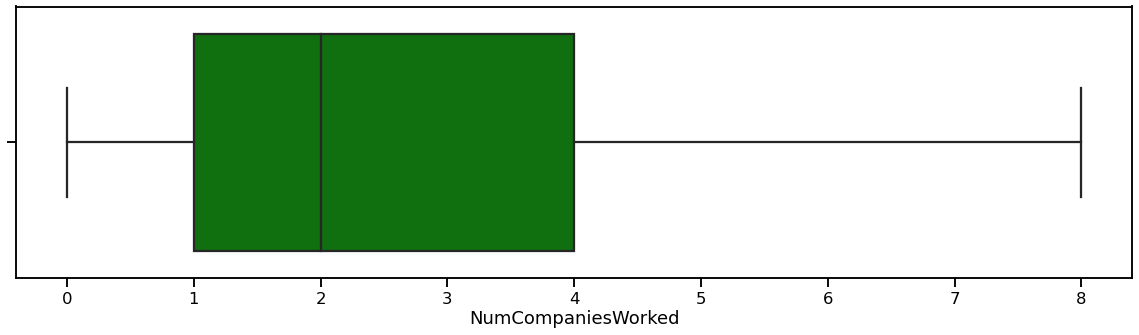

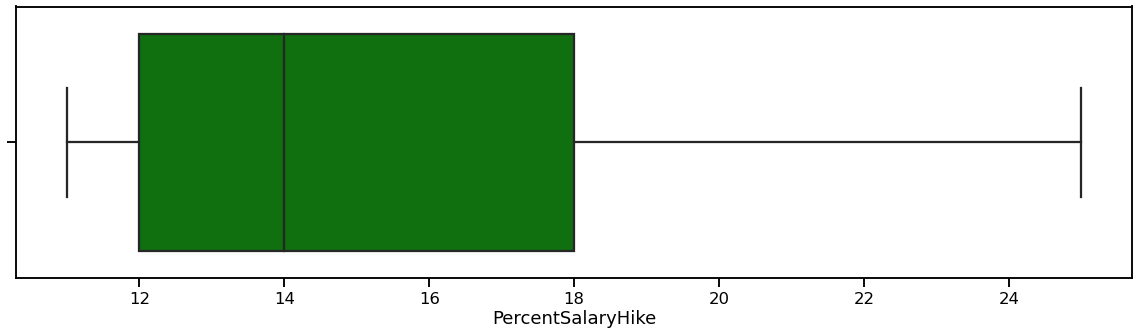

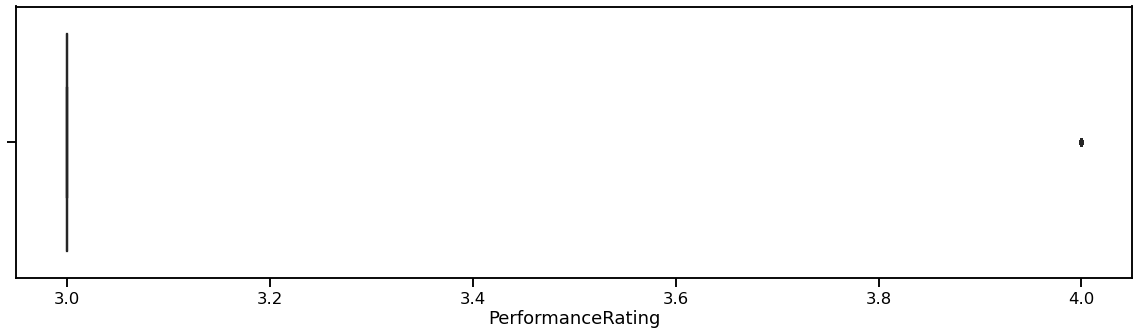

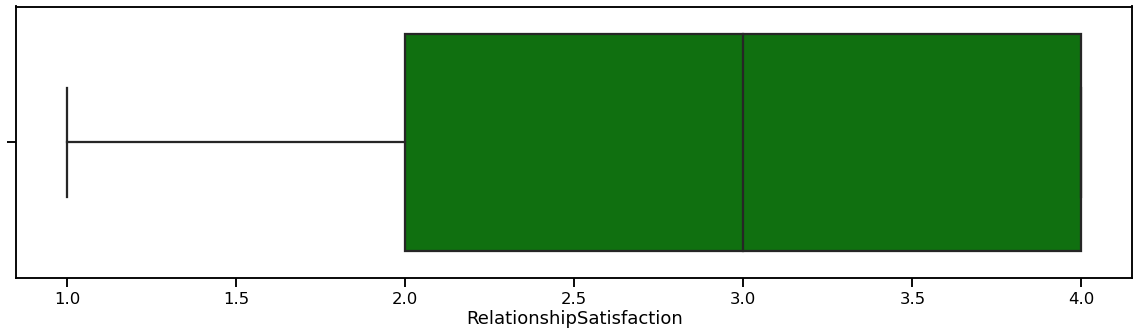

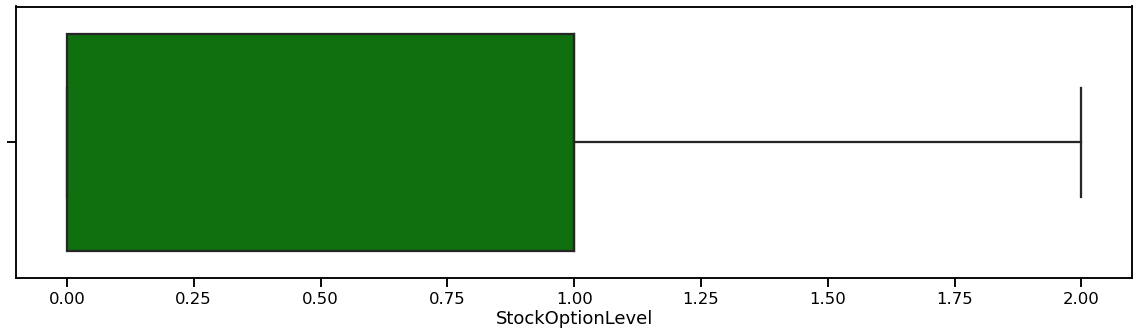

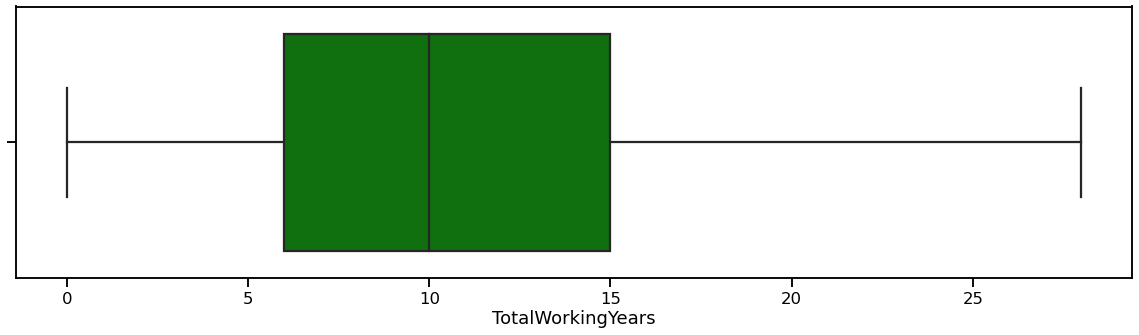

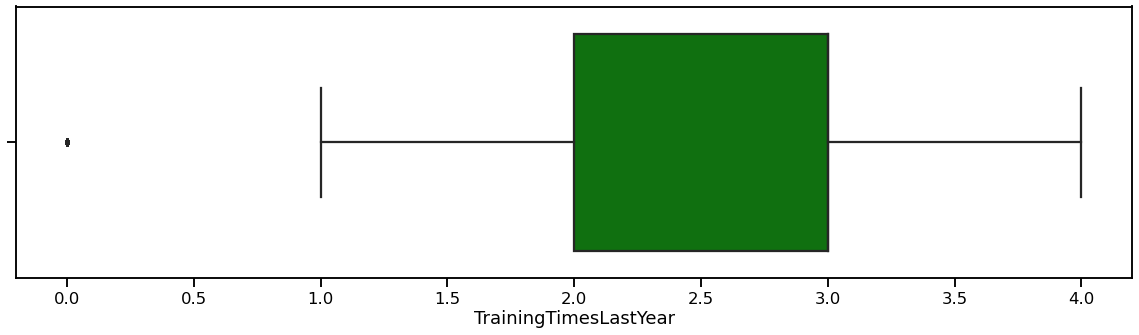

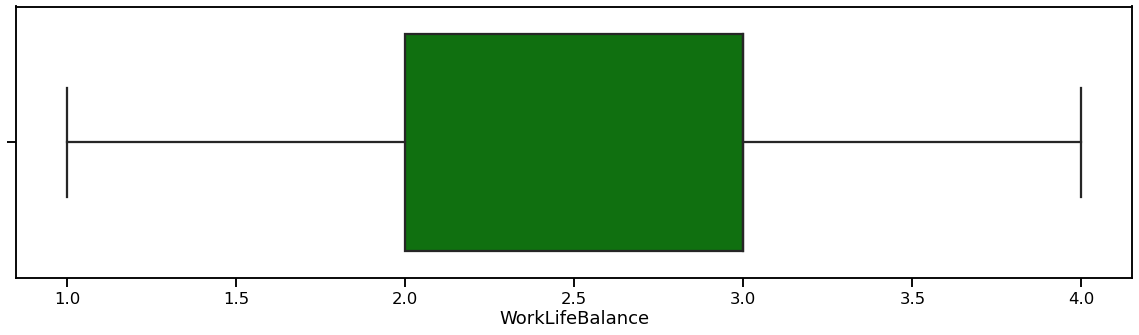

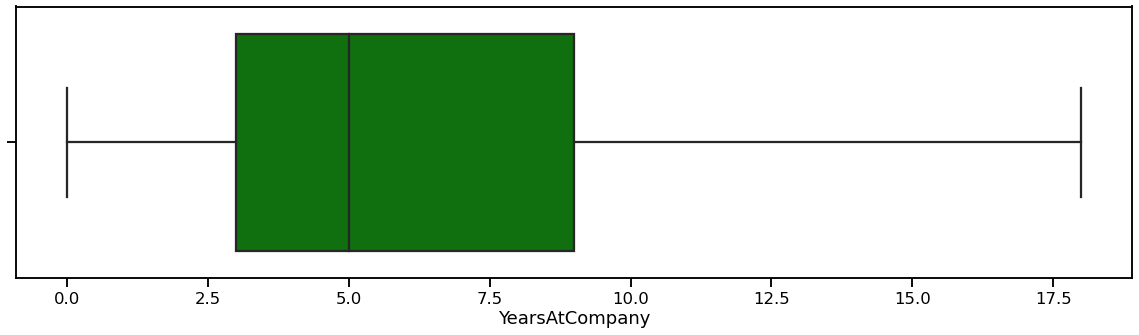

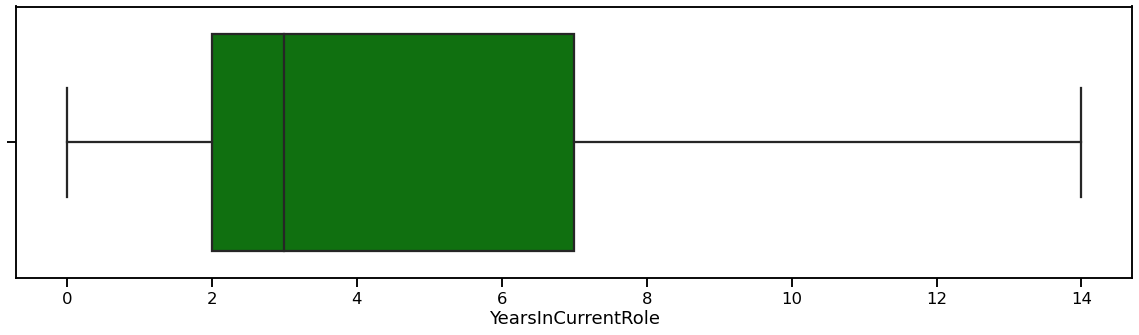

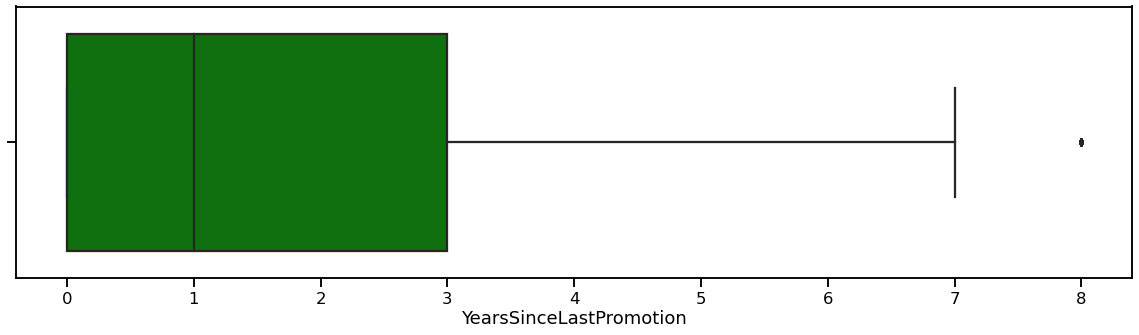

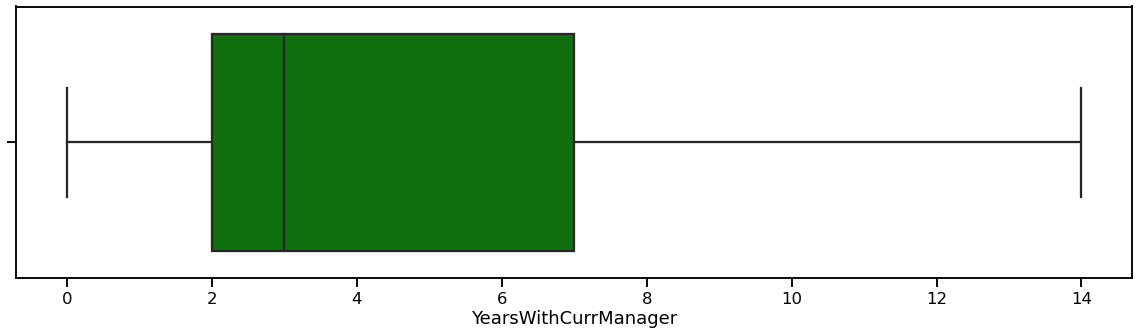

In [462]:
# Check outliers and data distribution of the numerical columns
for i in numerical_features:
    plt.figure(figsize=(20,5))
    sns.boxplot(df[i], color='green')
    plt.show()

**We detected a few outliers and used the capping approach to handle them. Used IQR method to determine the lower and upper bounds and capped the extreme values with the bound values.**

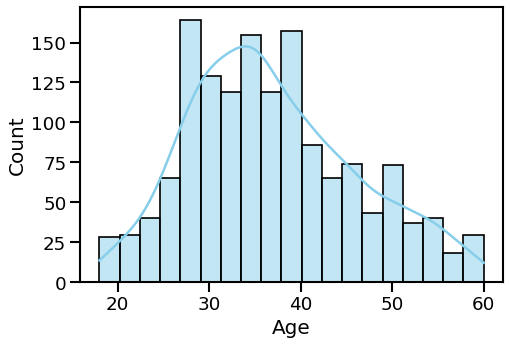

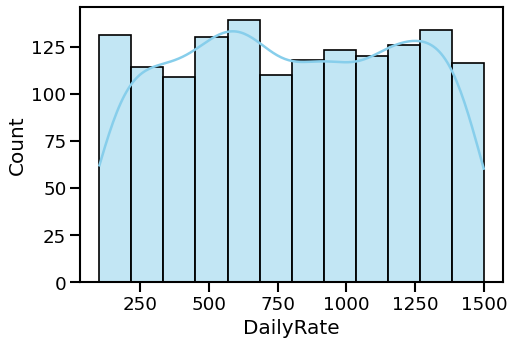

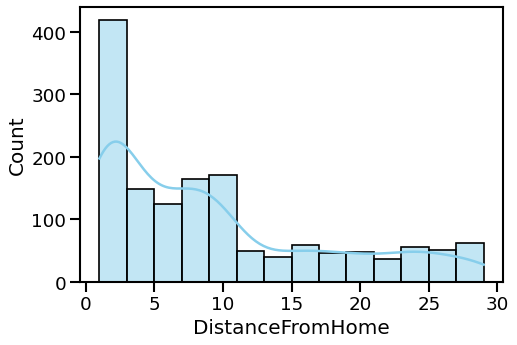

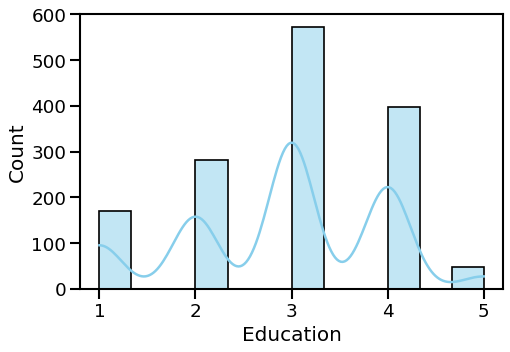

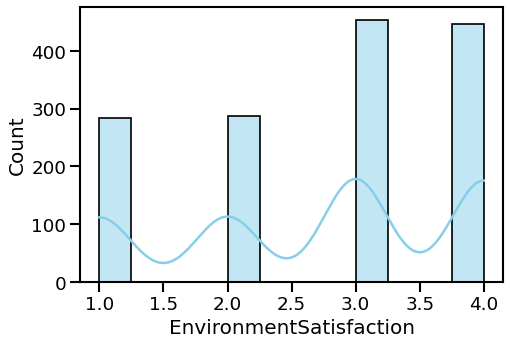

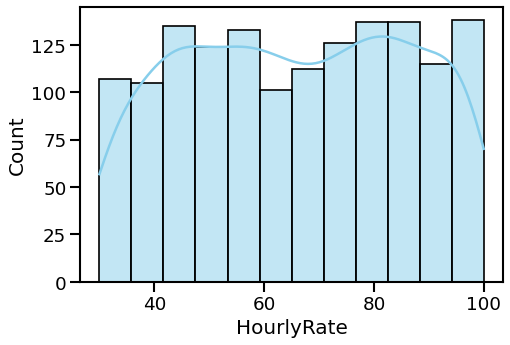

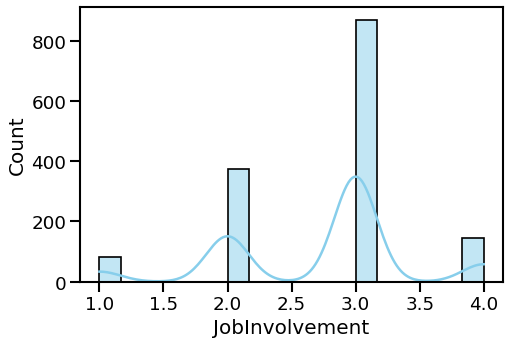

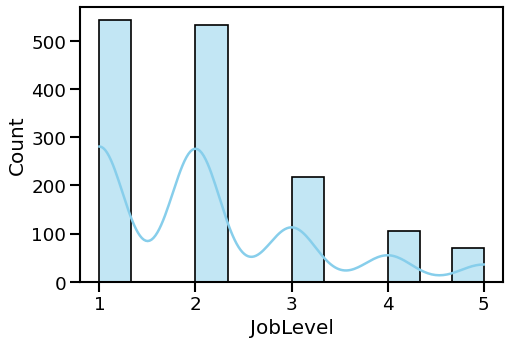

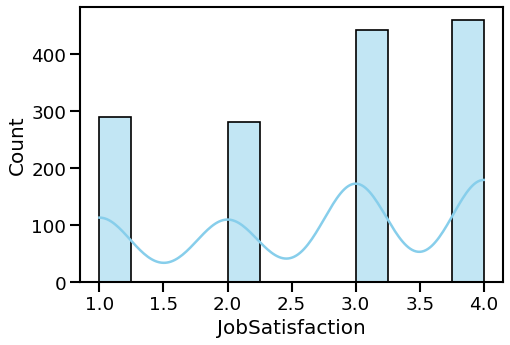

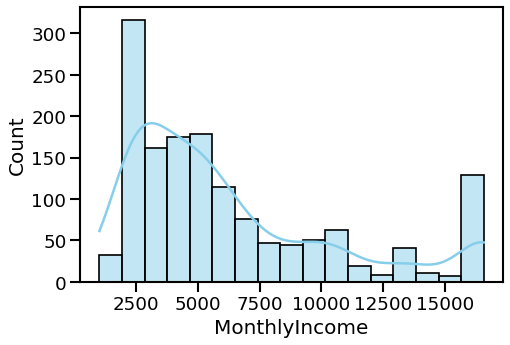

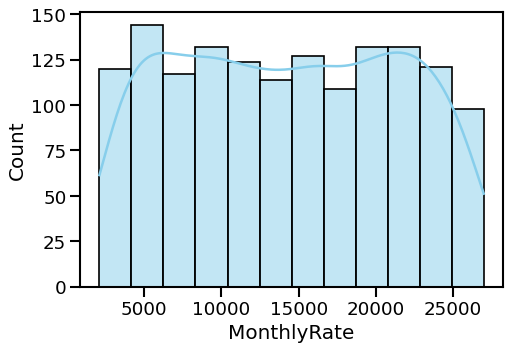

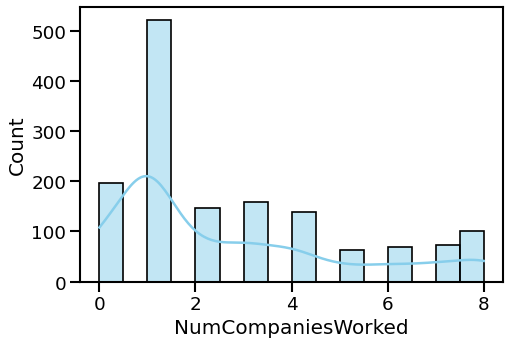

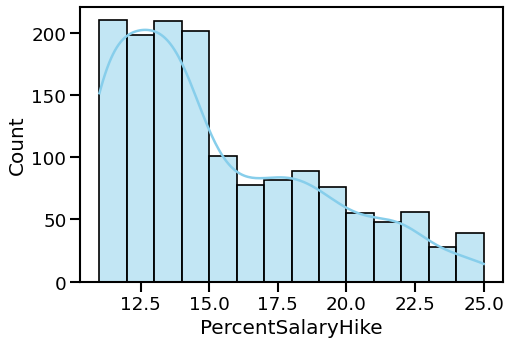

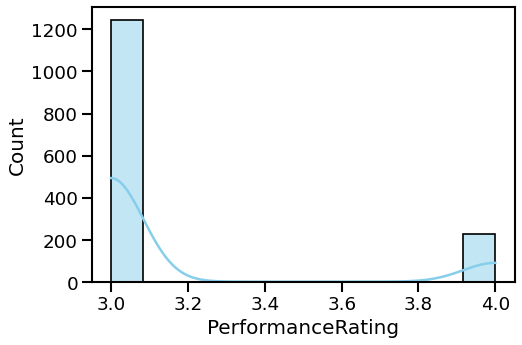

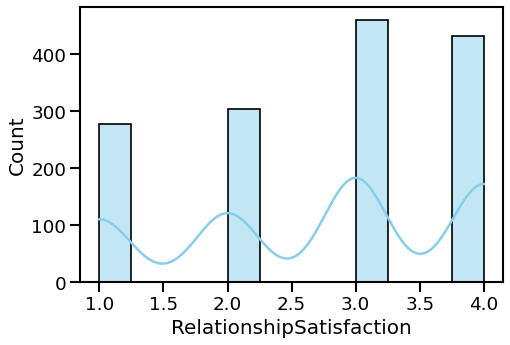

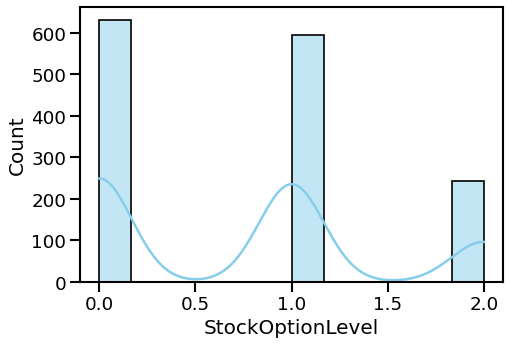

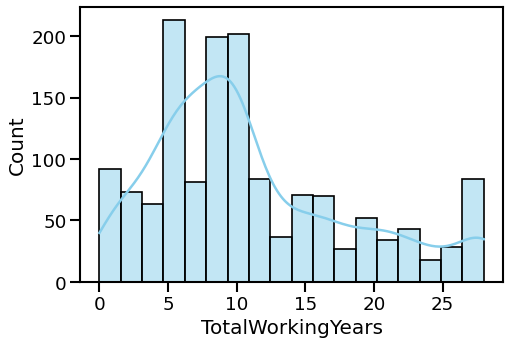

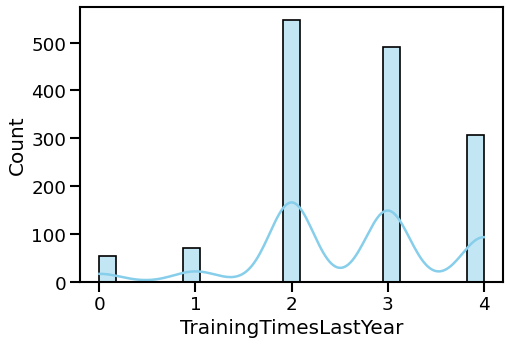

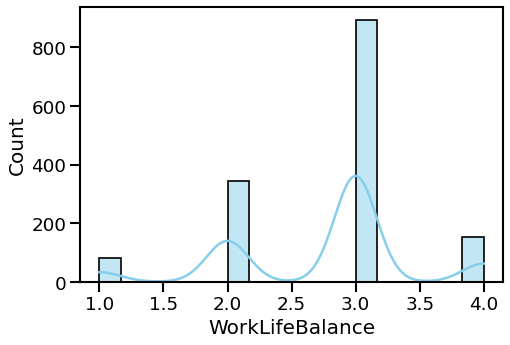

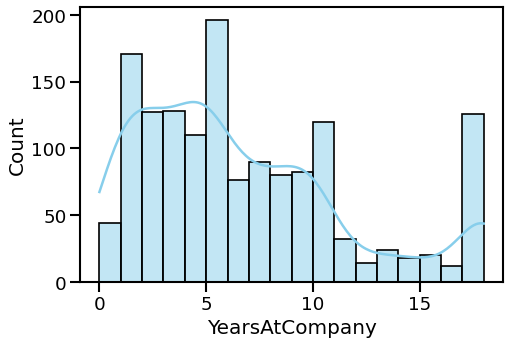

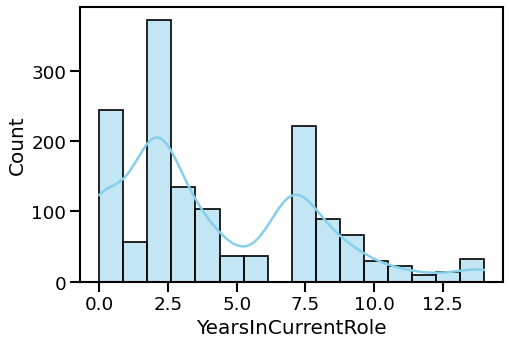

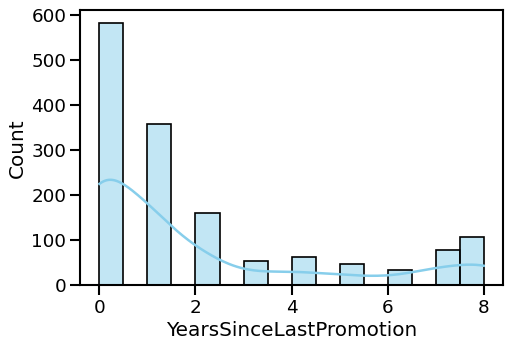

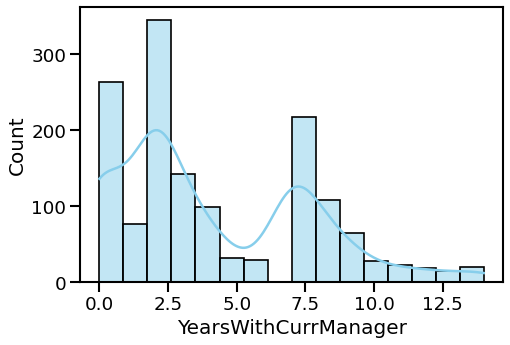

In [463]:
# Data distribution
for i in numerical_features:
    plt.figure(figsize=(15, 10), dpi=80)

    plt.subplot(221)
    sns.histplot(df[i], kde=True, color = 'skyblue')

In [464]:
def histplot(df, features):
    ''' Histplot of each feature with target variable '''
    for i in features:
        if i == 'Attrition':
            continue
        fig = px.histogram(df, x=i, color='Attrition', barmode='group', title='{} vs Attrition'.format(i), height=400, width=700)
        fig.show()

In [465]:
histplot(df, categorical_features)

**The above histplots provides insights on how each of the categorical features impact the target variable. For example, we can say Sales department employees are more likely to leave compared to employees in other departments. Similarly, employees who work overtime are more likely to leave.**

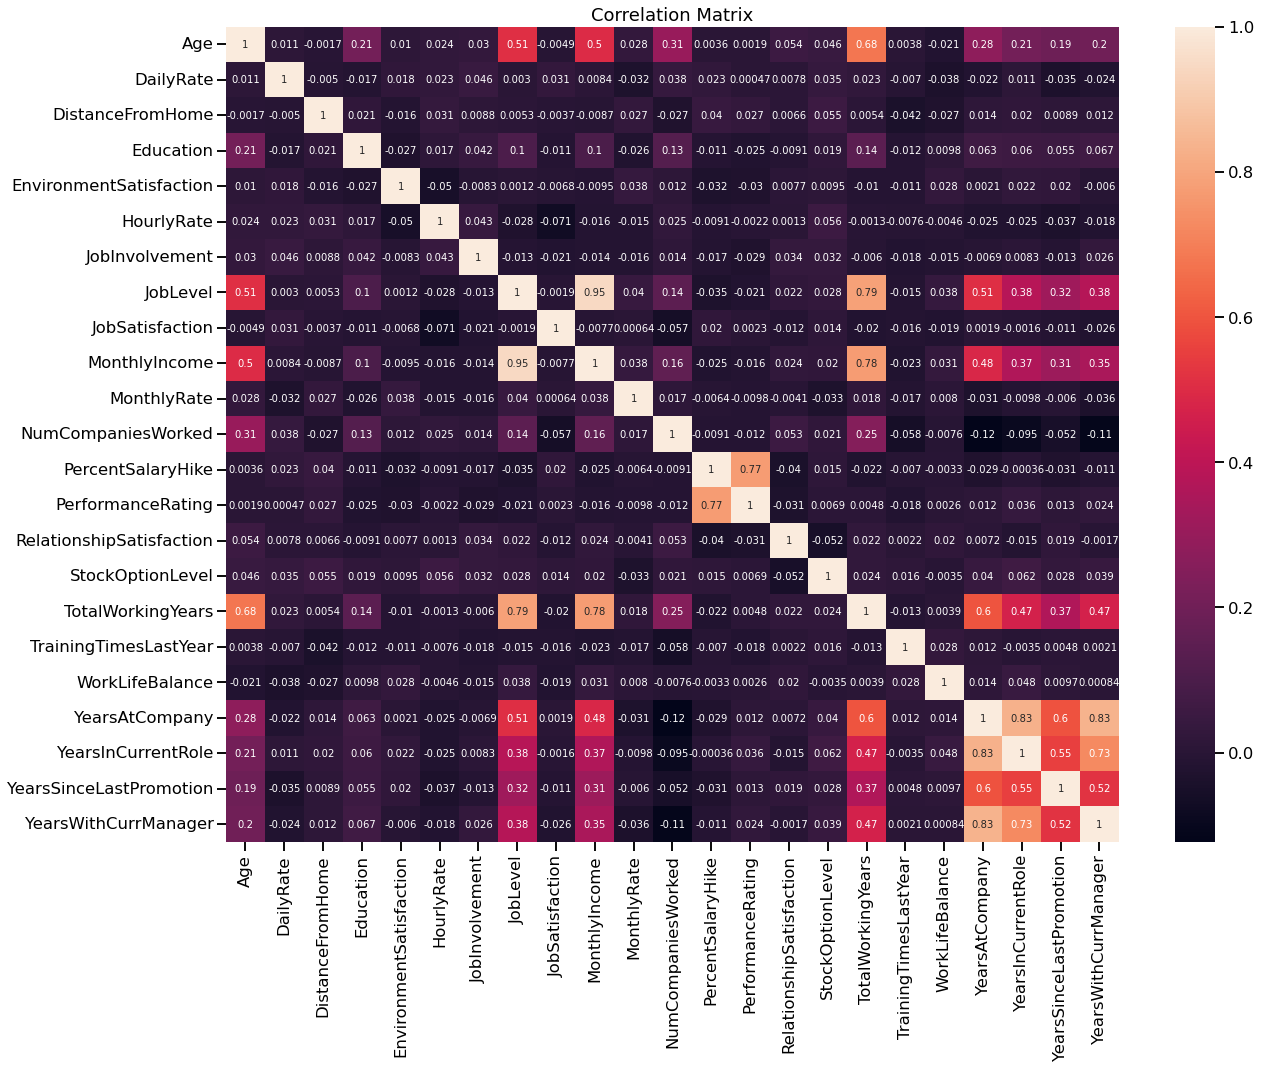

In [466]:
# Check correlation

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [467]:
# For simplicity, removing one of the features which are highly correlated
# JobLevel, MonthlyIncome, PercentSalaryHike, YearsInCurrentRole, YearsWithCurrManager

df.drop(['JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'YearsInCurrentRole', 'YearsWithCurrManager'], axis=1, inplace=True)
arr = df.columns
len(arr)

26

**Feature which are highly correlated, corr value more than 0.70 or less than -0.70 have been handled.**

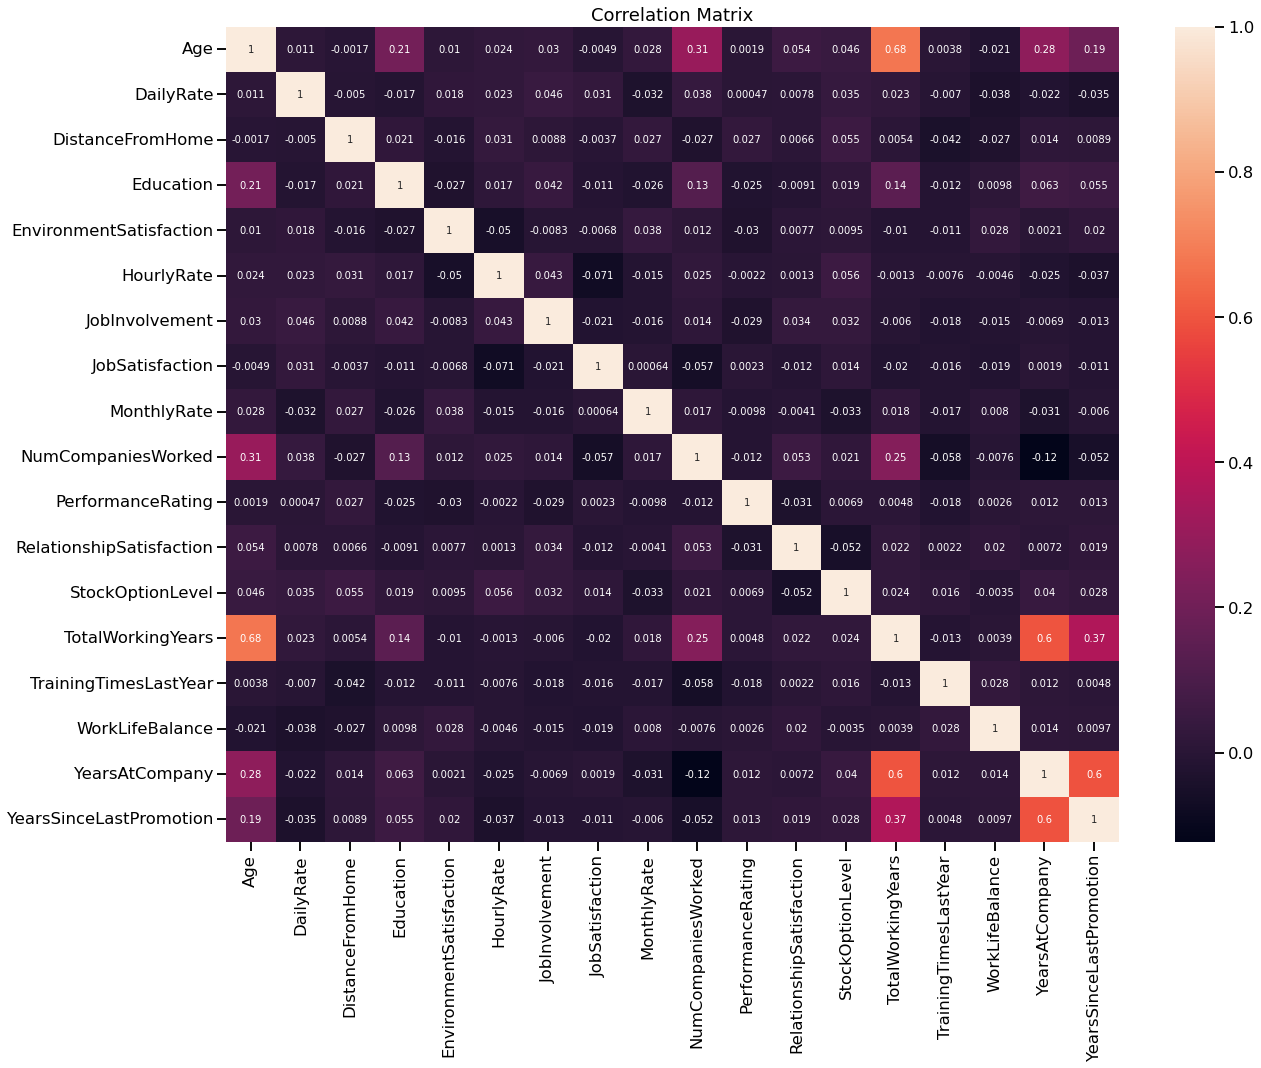

In [468]:
# Check correlation

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [469]:
# Attrition vs non-attrition

labels = ['Attrition', 'No Attrition']
values = [df.Attrition[df['Attrition']=='Yes'].count(), df.Attrition[df['Attrition']=='No'].count()]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1], title='Proportion of customer left vs continued')])
fig.show()

In [470]:
for i in categorical_features:
    print(i)
    print(df[i].value_counts())
    print()

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender
Male      882
Female    588
Name: Gender, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus

In [471]:
for i in categorical_features:
    if i == 'Attrition':
        continue
    fig = px.pie(df, names=i)
    fig.update_layout(width=800, height=500)
    fig.show()

In [472]:
df['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [473]:
histplot(df, ['JobSatisfaction'])

In [474]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

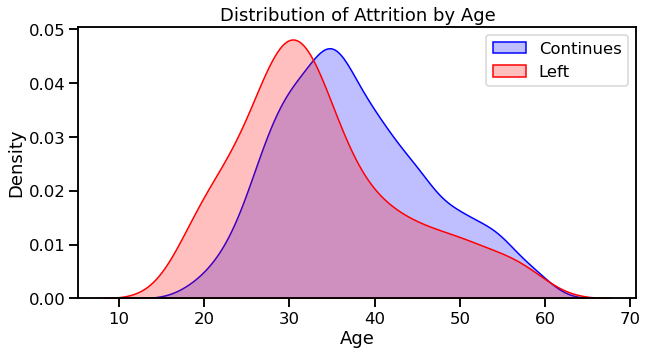

In [475]:
# Variation of churn rate with age of customers

plt.figure(figsize=(10,5))
ax = sns.kdeplot(df['Age'][(df['Attrition'] == 0)], color = 'Blue', shade=True)
ax = sns.kdeplot(df['Age'][(df['Attrition'] == 1)], color = 'Red', shade=True)

ax.legend(['Continues', 'Left'], loc = 'upper right')
ax.set_ylabel("Density")
ax.set_xlabel('Age')
ax.set_title('Distribution of Attrition by Age')
plt.show()

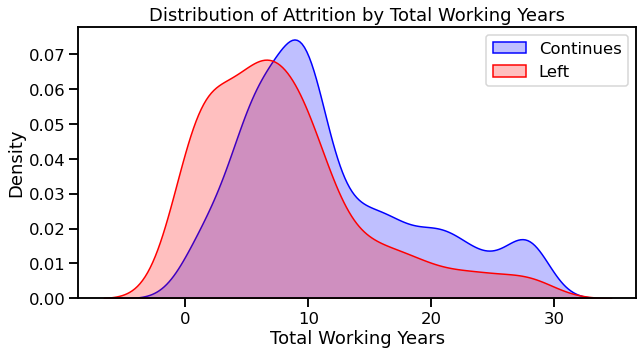

In [399]:
# Variation of churn rate with age of customers

plt.figure(figsize=(10,5))
ax = sns.kdeplot(df['TotalWorkingYears'][(df['Attrition'] == 0)], color = 'Blue', shade=True)
ax = sns.kdeplot(df['TotalWorkingYears'][(df['Attrition'] == 1)], color = 'Red', shade=True)

ax.legend(['Continues', 'Left'], loc = 'upper right')
ax.set_ylabel("Density")
ax.set_xlabel('Total Working Years')
ax.set_title('Distribution of Attrition by Total Working Years')
plt.show()

## Feature Engineering

In [476]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [477]:
# seggregate categorical and numerical features
categorical_features = [i for i in df.columns if df[f'{i}'].dtypes == 'object']
numerical_features = [i for i in df.columns if i not in categorical_features]

categorical_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [478]:
for i in categorical_features:
    print(df[i].value_counts())
    print()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64



In [479]:
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['OverTime']

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [480]:
df = pd.get_dummies(df, columns=['Gender'])

In [481]:
# Frequency Encoding
frequency_encoding_map = df['BusinessTravel'].value_counts(normalize=True).to_dict()
df['BusinessTravel'] = df['BusinessTravel'].map(frequency_encoding_map)

frequency_encoding_map = df['MaritalStatus'].value_counts(normalize=True).to_dict()
df['MaritalStatus'] = df['MaritalStatus'].map(frequency_encoding_map)

In [406]:
# Frequency Encoding
frequency_encoding_map = df['Department'].value_counts(normalize=True).to_dict()
df['Department'] = df['Department'].map(frequency_encoding_map)

frequency_encoding_map = df['EducationField'].value_counts(normalize=True).to_dict()
df['EducationField'] = df['EducationField'].map(frequency_encoding_map)

frequency_encoding_map = df['JobRole'].value_counts(normalize=True).to_dict()
df['JobRole'] = df['JobRole'].map(frequency_encoding_map)

In [407]:
for i in df.columns:
    if df[i].dtype == 'float64':
        df[i] = df[i].astype('int8')
    elif df[i].dtype == 'int64':
        df[i] = df[i].astype('int8')
    elif df[i].dtype == 'uint8':
        df[i] = df[i].astype('int8')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int8 
 1   Attrition                 1470 non-null   int8 
 2   BusinessTravel            1470 non-null   int8 
 3   DailyRate                 1470 non-null   int8 
 4   Department                1470 non-null   int8 
 5   DistanceFromHome          1470 non-null   int8 
 6   Education                 1470 non-null   int8 
 7   EducationField            1470 non-null   int8 
 8   EnvironmentSatisfaction   1470 non-null   int8 
 9   HourlyRate                1470 non-null   int8 
 10  JobInvolvement            1470 non-null   int8 
 11  JobRole                   1470 non-null   int8 
 12  JobSatisfaction           1470 non-null   int8 
 13  MaritalStatus             1470 non-null   int8 
 14  MonthlyRate               1470 non-null 

In [408]:
df.iloc[:5,:15]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate
0,41,1,0,78,0,1,2,0,2,94,3,0,4,0,23
1,49,0,0,23,0,8,1,0,3,61,2,0,2,0,75
2,37,1,0,93,0,2,2,0,4,92,2,0,3,0,92
3,33,0,0,112,0,3,4,0,4,56,3,0,3,0,119
4,27,0,0,79,0,2,1,0,1,40,3,0,2,0,-8


In [409]:
df.iloc[:5,15:]

,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Gender_Female,Gender_Male
0,8,1,3,1,0,8,0,1,6,0,1,0
1,1,0,4,4,1,10,3,3,10,1,0,1
2,6,1,3,2,0,7,3,3,0,0,0,1
3,1,1,3,3,0,8,3,3,8,3,1,0
4,8,0,3,4,1,6,3,3,2,2,0,1


In [410]:
# check for negative values in any of the features, none of the features should have negative values
list(df.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'Gender_Female',
 'Gender_Male']

In [411]:
# Feature Scaling
scaler = MinMaxScaler()
num_features = list(df.columns)

df[num_features] = scaler.fit_transform(df[num_features])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Gender_Female,Gender_Male
0,0.547619,1.0,0.0,0.807843,0.0,0.000000,0.25,0.0,0.333333,0.914286,...,0.0,0.000000,0.0,0.285714,0.00,0.000000,0.333333,0.000,1.0,0.0
1,0.738095,0.0,0.0,0.592157,0.0,0.250000,0.00,0.0,0.666667,0.442857,...,1.0,1.000000,0.5,0.357143,0.75,0.666667,0.555556,0.125,0.0,1.0
2,0.452381,1.0,0.0,0.866667,0.0,0.035714,0.25,0.0,1.000000,0.885714,...,0.0,0.333333,0.0,0.250000,0.75,0.666667,0.000000,0.000,0.0,1.0
3,0.357143,0.0,0.0,0.941176,0.0,0.071429,0.75,0.0,1.000000,0.371429,...,0.0,0.666667,0.0,0.285714,0.75,0.666667,0.444444,0.375,1.0,0.0
4,0.214286,0.0,0.0,0.811765,0.0,0.035714,0.00,0.0,0.000000,0.142857,...,0.0,1.000000,0.5,0.214286,0.75,0.666667,0.111111,0.250,0.0,1.0


In [412]:
# Handle Class Imbalance


## Modelling

In [415]:
# importing libraries for this section 

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [416]:
# Split the dataset into train and test set

X = df.drop('Attrition', axis=1)
y = df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [417]:
def model_score(model):
    '''To print classification report and confusion matrix for each model'''
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.set_context('talk')
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       380
         1.0       0.91      0.16      0.28        61

    accuracy                           0.88       441
   macro avg       0.90      0.58      0.61       441
weighted avg       0.89      0.88      0.84       441



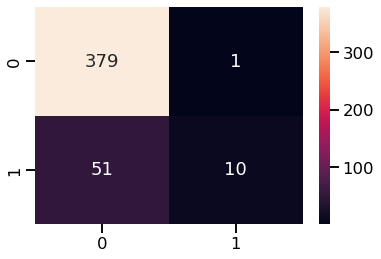

In [418]:
# lg = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, max_iter=2000)
lg = LogisticRegressionCV(penalty='l2', solver='sag', cv=5, max_iter=2000)

lg.fit(x_train, y_train)

model_score(lg)

In [419]:
# Cross Validating to get the best hyperparameters

# params = {'max_depth':[3, 5, 10, 13], 
#           'n_estimators':[100, 200, 400, 600, 900],
#           'max_features':[2, 4, 6, 8, 10]}

# model = RandomForestClassifier()
# gs = GridSearchCV(
#         estimator=model,
#         param_grid=params, 
#         cv=3, 
#         n_jobs=-1, 
#         scoring='f1',
#         verbose=2
#     )
# fitted_model = gs.fit(x_train, y_train)
# fitted_model.best_estimator_

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       380
         1.0       0.62      0.13      0.22        61

    accuracy                           0.87       441
   macro avg       0.75      0.56      0.57       441
weighted avg       0.84      0.87      0.83       441



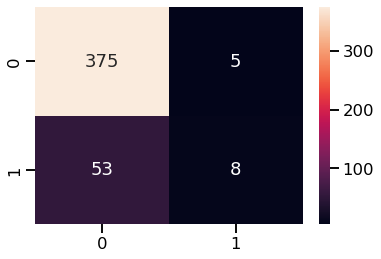

In [420]:
rf= RandomForestClassifier(max_depth=10, max_features=10, n_estimators=400, bootstrap=True, min_samples_leaf=3, min_samples_split=5)
rf.fit(x_train,y_train)

model_score(rf)

In [421]:
# Fething the Area under the curve 
auc_score1 = roc_auc_score(y_test, lg.predict_proba(x_test)[:, 1])
auc_score3 = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

print("Logistic Regression: ", auc_score1)
print("Random Forest: ", auc_score3)

Logistic Regression:  0.7722174288179464
Random Forest:  0.7514236410698878


In [422]:
# calculating the false positive and true positive rate for each of the models
fpr1, tpr1, thresh1 = roc_curve(y_test, lg.predict_proba(x_test)[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf.predict_proba(x_test)[:, 1], pos_label=1)

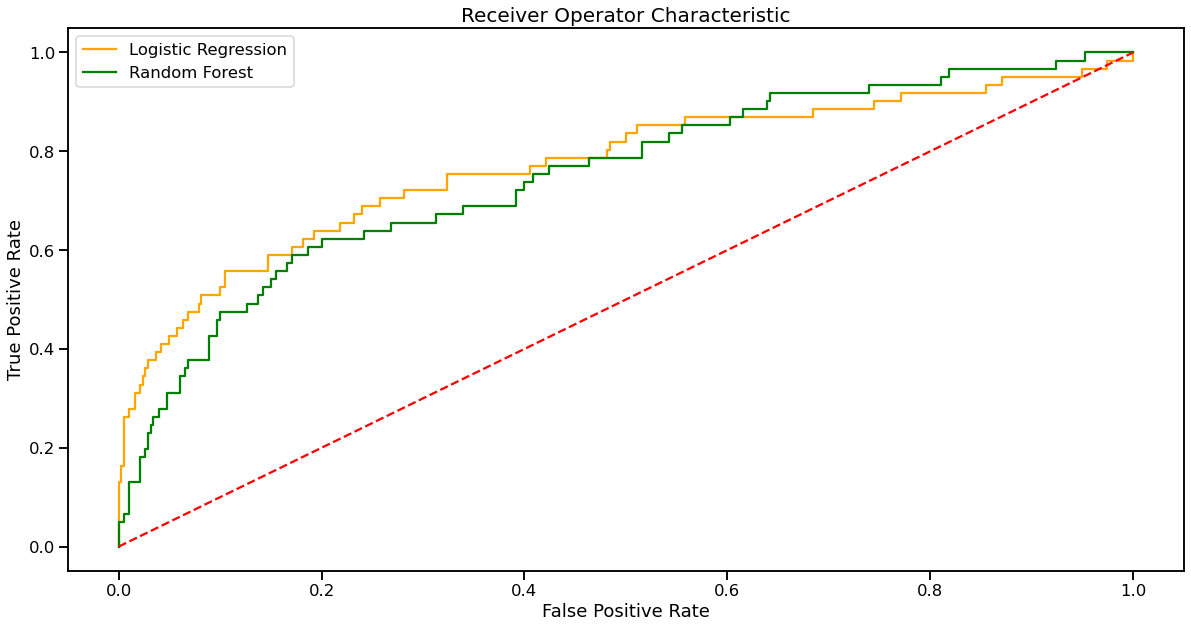

In [423]:
# Plotting ROC curve
plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1,  color = 'orange', label='Logistic Regression')
plt.plot(fpr3, tpr3, color = 'green', label='Random Forest')
         
plt.title('Receiver Operator Characteristic', fontsize=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--') 
plt.legend(loc = 'best')
plt.show()

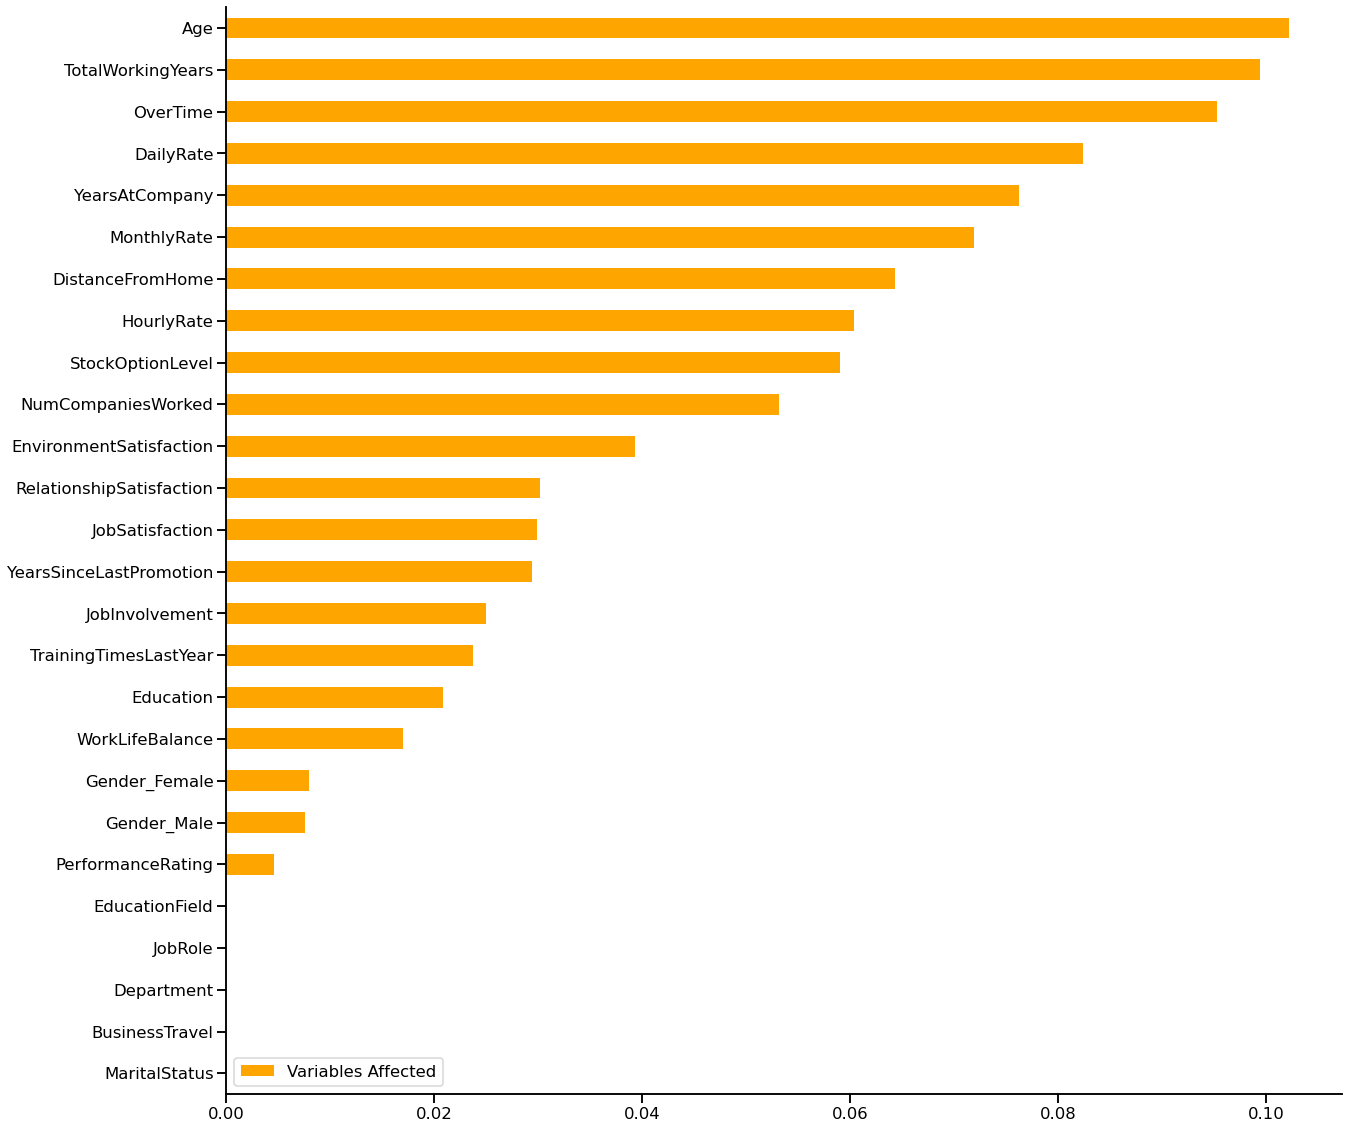

In [424]:
feat_scores = pd.DataFrame({'Variables Affected': rf.feature_importances_}, index=X.columns)
feat_scores = feat_scores.sort_values(by = 'Variables Affected')
feat_scores.plot(kind = 'barh', figsize=(20,20), color='orange')
sns.despine()

## Conclusions

**General**
- We have compare Logistic Regression and Random Forest's performance on confusion matrix and auc-roc scores. Perhaps, Racall will be a better evaluation metric in this case
- Age, Work Experience and Over time features are the top 3 contributing features towards the target variable
- Juniors with less work exp are more likely to leave
- 40% of the workforce is women
- Men are slightly more likely to leave compared to their female counterparts

**About the data**
- There were a lot of outliers in a couple of numerical features
- No missing values
- There is a high class imbalance in the dataset
- Some of the obvious features like years in the company, years under the same manager are highly correlated
- Some of the numerical features were ambiguous like JobInvolvement, WorkLifeBalance, PerformanceRating

## Further Steps

- Iterate over the data cleaning and preprocessing to get better model results, like handle the class imbalance
- Explore better models like XGBoost and LightGBM
- Choose Recall as the evaluation metric as our concern is to reduce the False Negatives
- Explore further on how the other major features are related to each other or are impacting the Attrition
- We can use SHAP to analyse the feature importance